# Diabetic Preditctions

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import the dataset

In [2]:
dataset = pd.read_csv("Data/diabetes.csv")
dataset.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
dataset.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

### Checking Null Values

In [5]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Checking Duplicate Values

In [6]:
dataset.duplicated().sum()

0

## Data Visualization

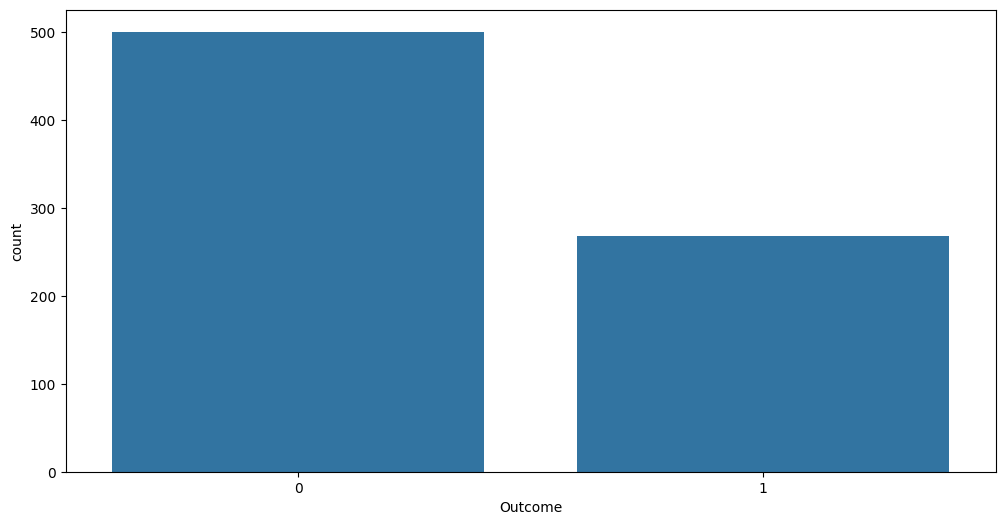

In [7]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Outcome', data = dataset)
plt.show()

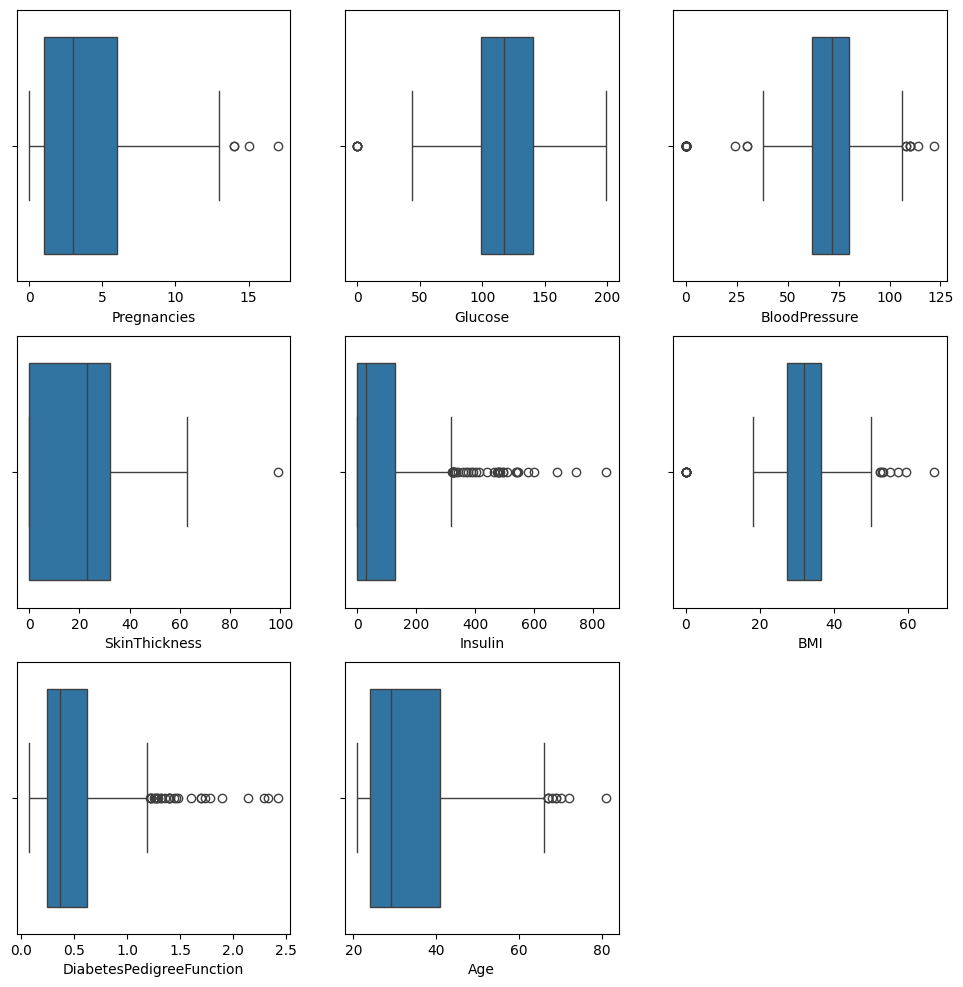

In [8]:
plt.figure(figsize = (12,12))

for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.boxplot(x = col, data = dataset)
plt.show()


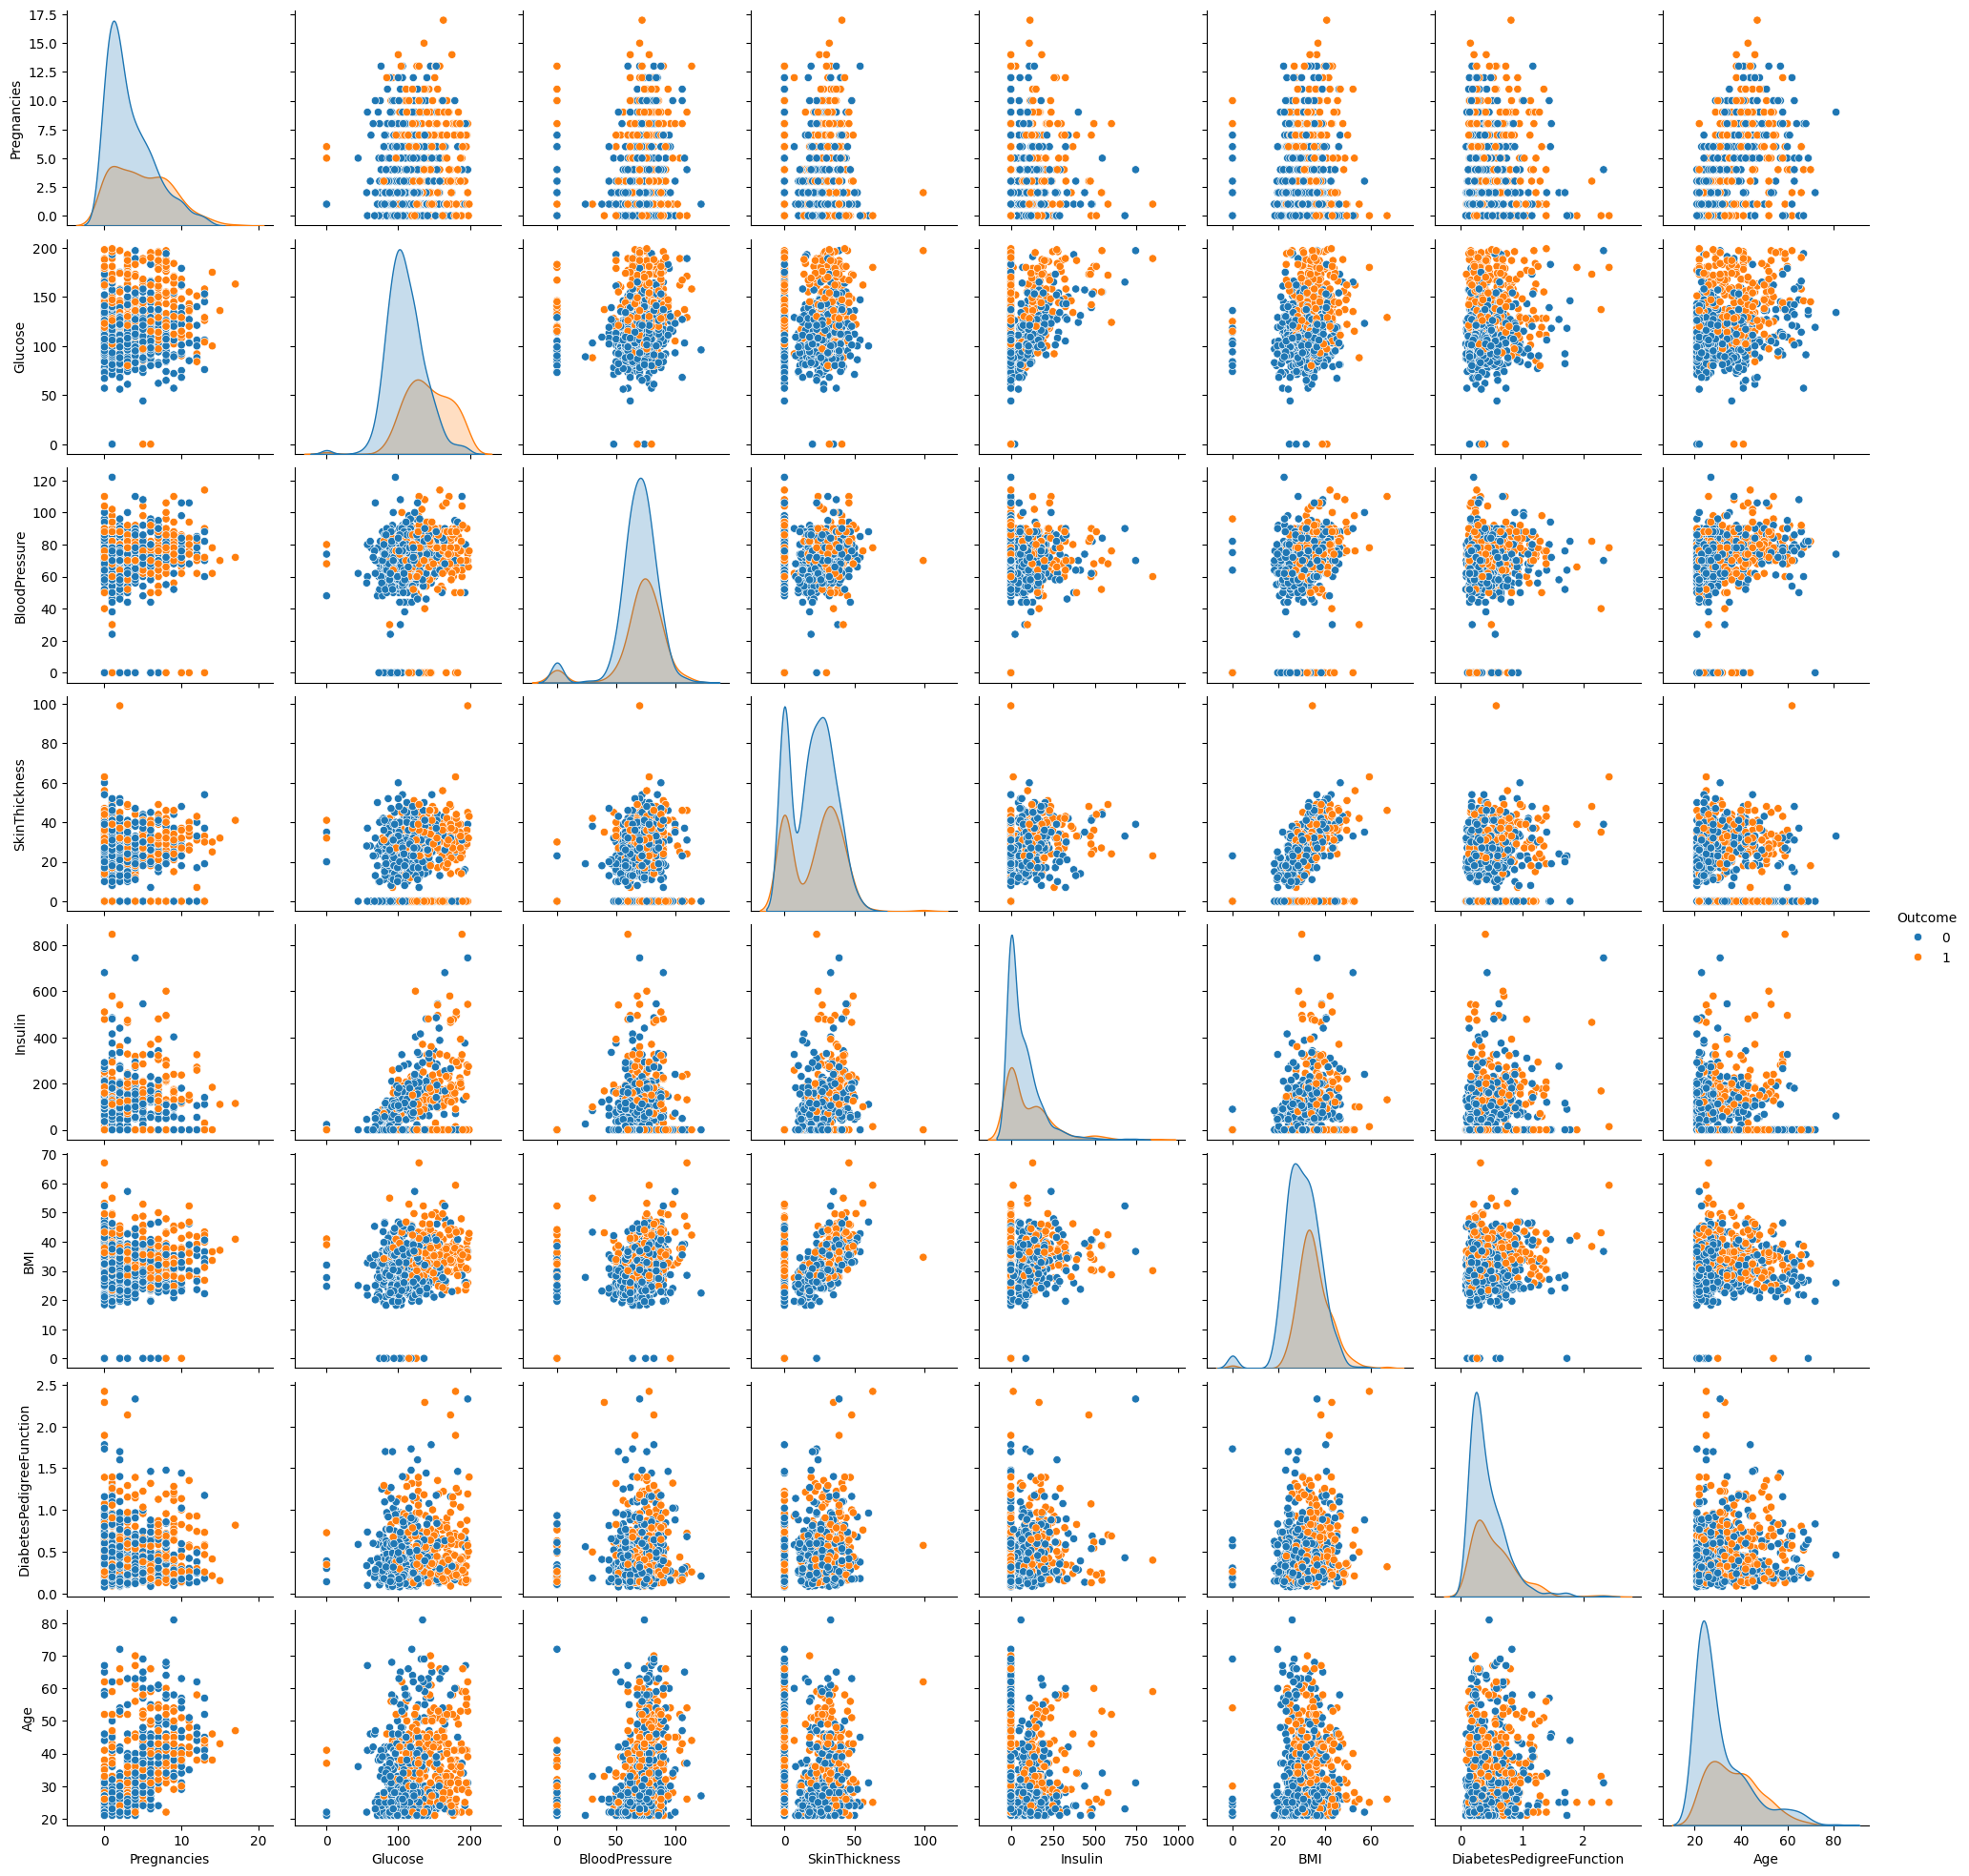

In [9]:
sns.pairplot(data = dataset, hue = 'Outcome')
plt.show()

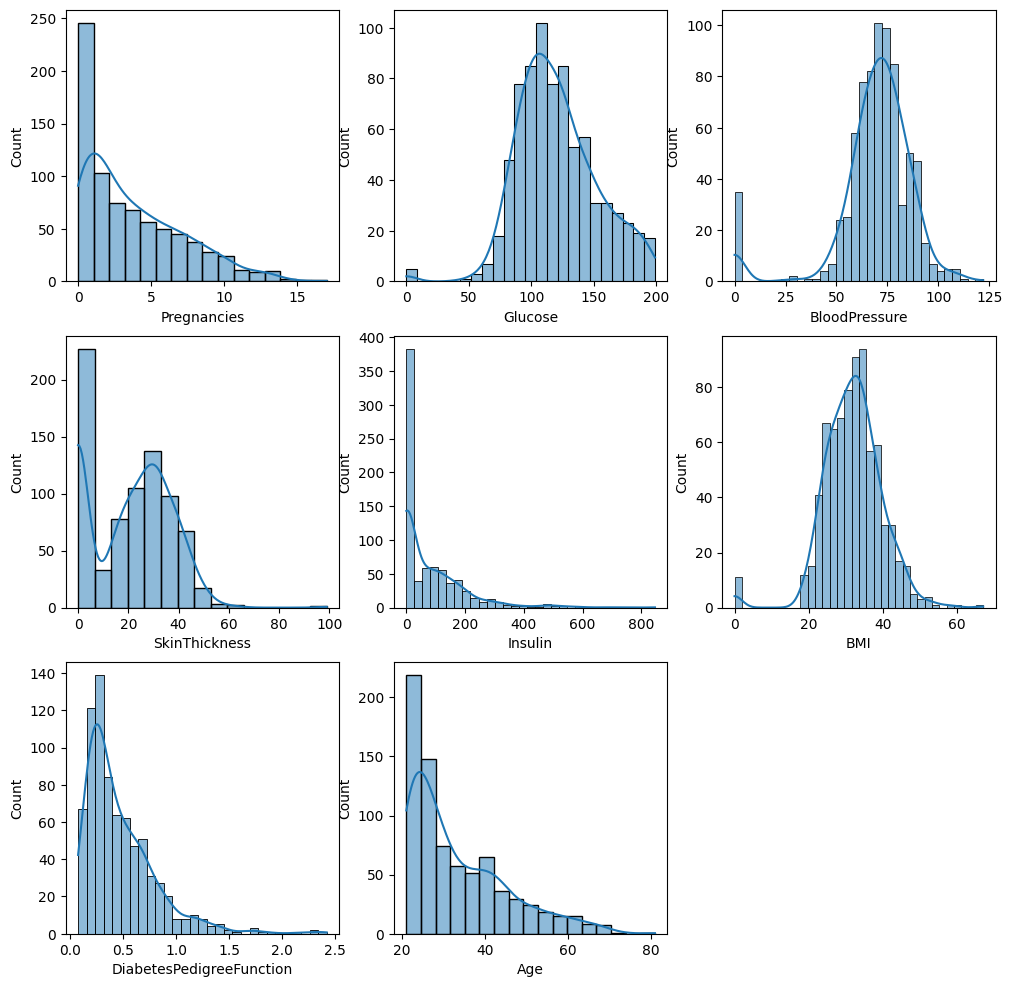

In [10]:
plt.figure(figsize = (12,12))

for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data = dataset, kde = True)
plt.show()


## Correlation

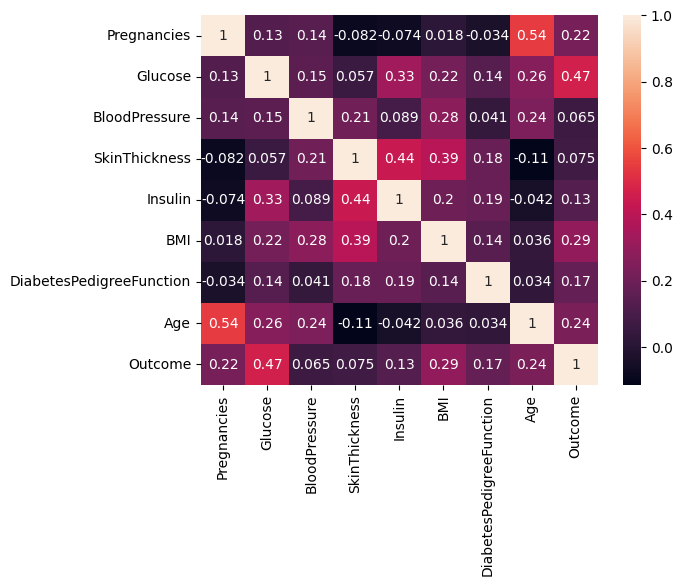

In [11]:
sns.heatmap(dataset.corr(), annot = True)
plt.show()

## Fix zeroes in the dataset

In [12]:
dataset_new = dataset

dataset_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = dataset_new[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

In [13]:
dataset_new.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [14]:
dataset_new['Glucose'].fillna(dataset_new['Glucose'].mean(), inplace = True)
dataset_new['BloodPressure'].fillna(dataset_new['BloodPressure'].mean(), inplace = True)
dataset_new["SkinThickness"].fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new["Insulin"].fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new["BMI"].fillna(dataset_new["BMI"].mean(), inplace = True)

C:\Users\ranir\AppData\Local\Temp\ipykernel_14228\1356614037.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_new['Glucose'].fillna(dataset_new['Glucose'].mean(), inplace = True)
C:\Users\ranir\AppData\Local\Temp\ipykernel_14228\1356614037.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always

In [15]:
dataset_new.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Updated Data Visualisation

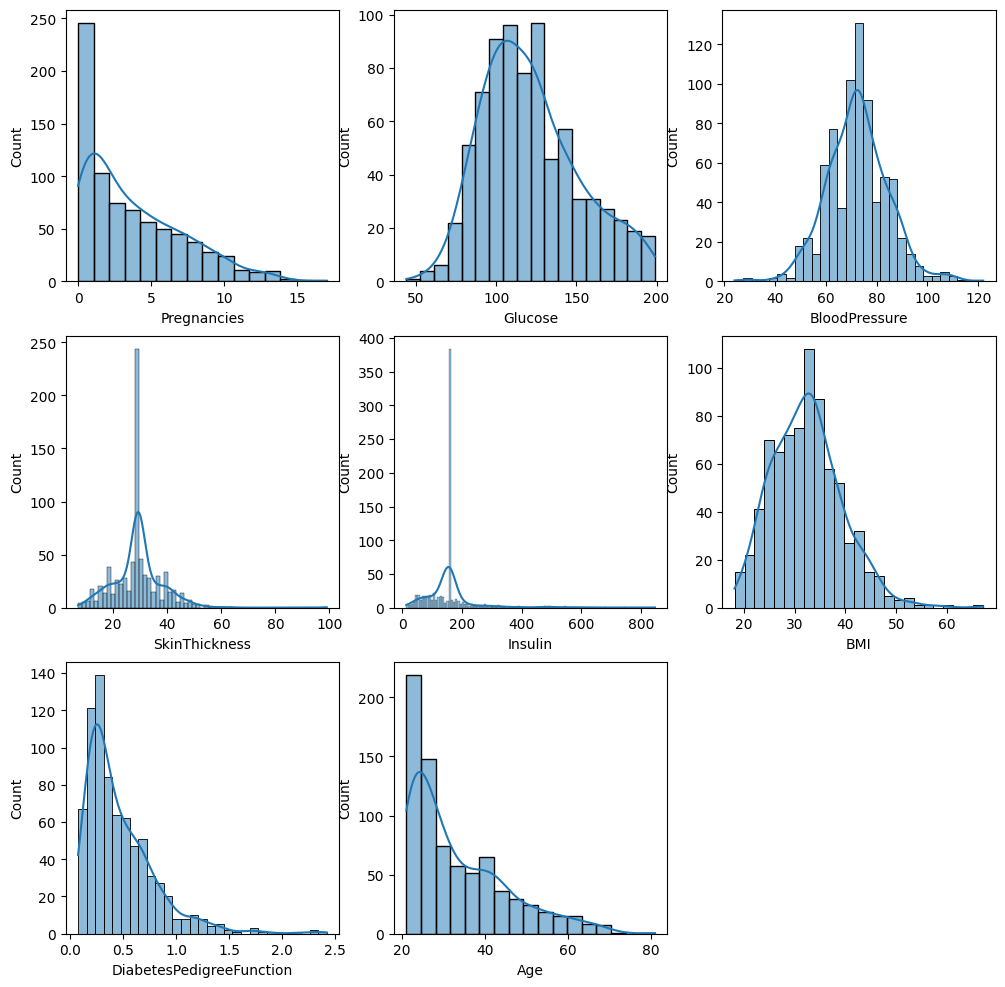

In [16]:
plt.figure(figsize = (12,12))

for i, col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3, i+1)
    sns.histplot(x = col, data = dataset_new, kde = True)
plt.show()


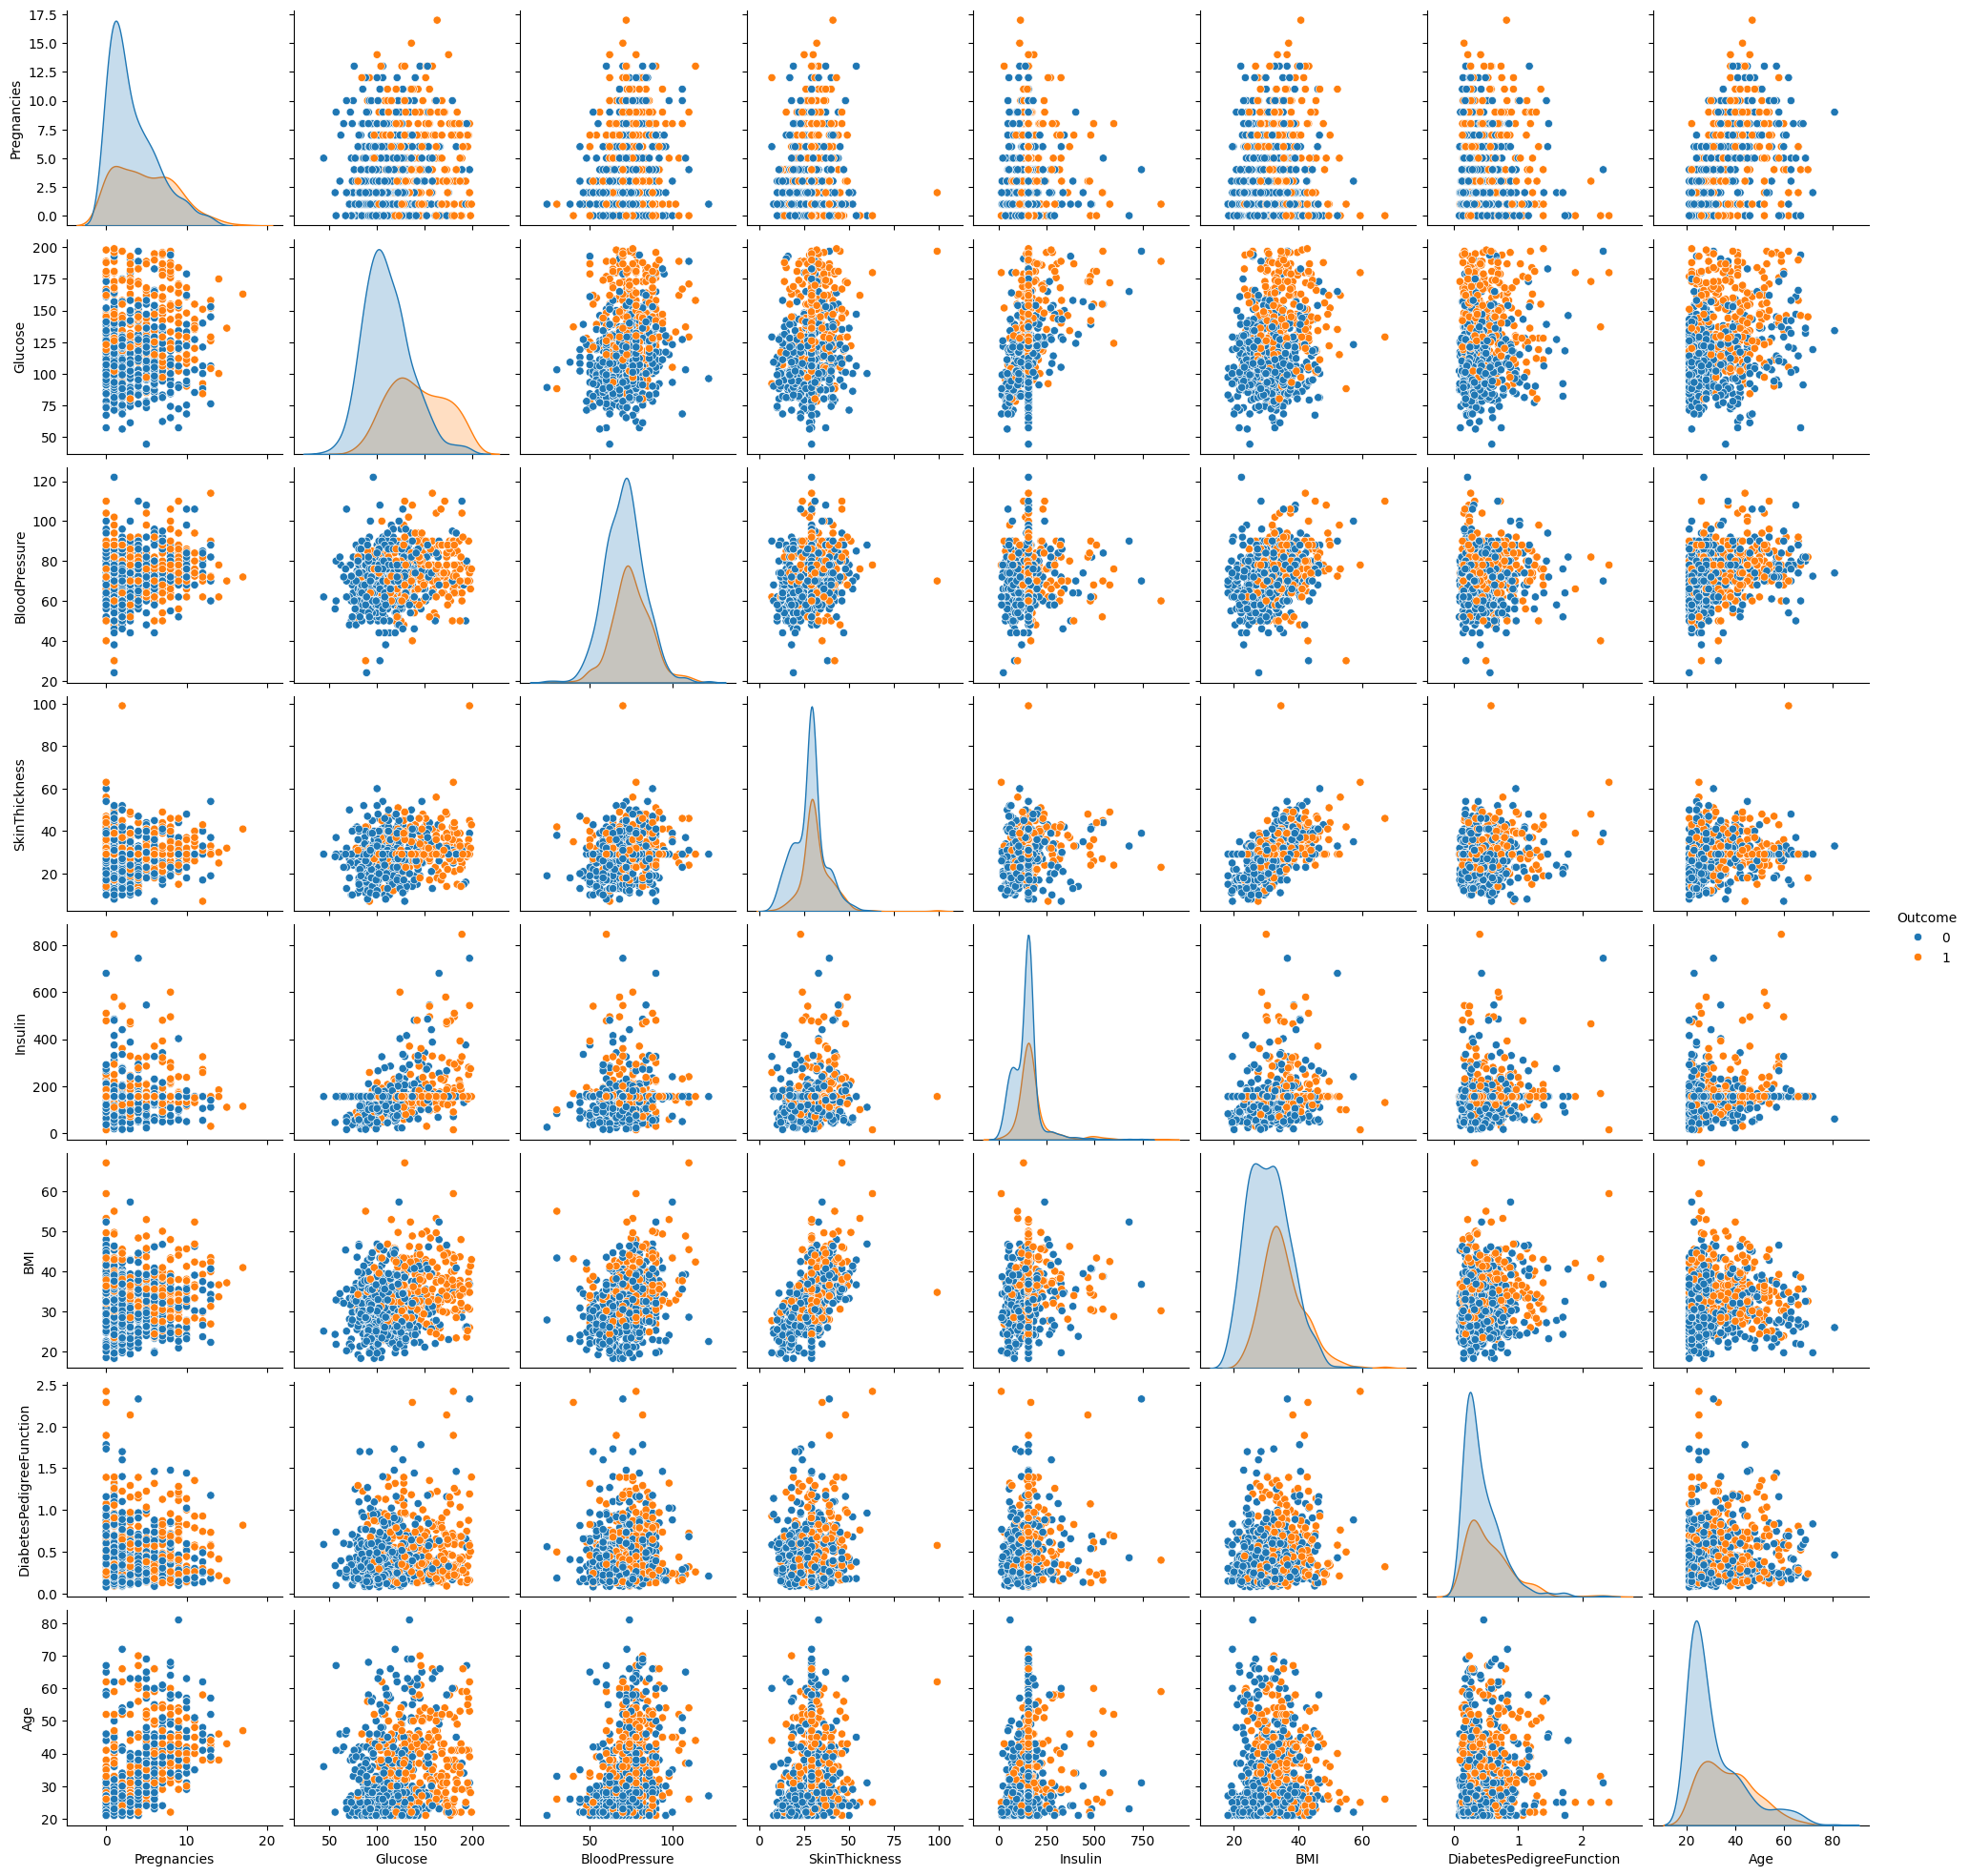

In [17]:
sns.pairplot(data = dataset_new, hue = 'Outcome')
plt.show()

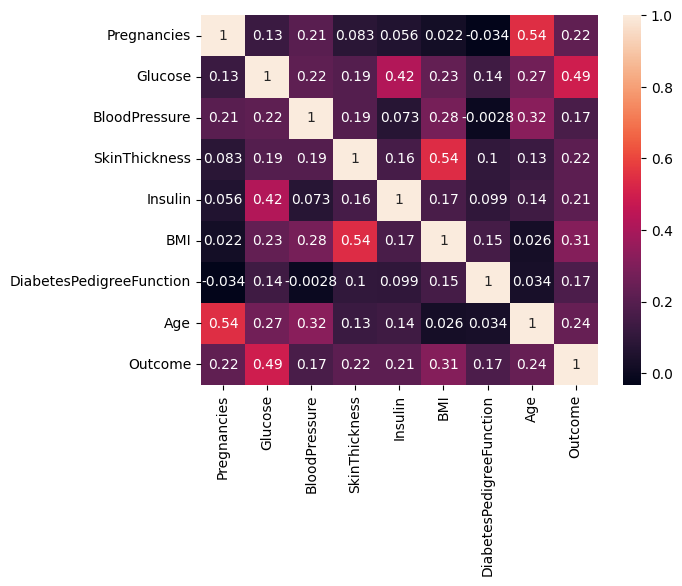

In [18]:
sns.heatmap(dataset_new.corr(), annot = True)
plt.show()

## Features and Output

In [20]:
X = dataset_new.drop('Outcome', axis = 1)
y = dataset_new['Outcome']

### Standardisation

In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()

sc_X.fit_transform(X)

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16629174,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85253118,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33283341,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.91074963,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34311972,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29945588,
        -0.47378505, -0.87137393]])

### Train & Test 

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 42)
print(X_train.shape, X_test.shape)


(614, 8) (154, 8)


## Import Multiple Models

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics


## Models

In [39]:
names = ['Logistic Regression', 'SVM', 'Random Forest', 'XGBoost']
classifiers = [LogisticRegression(max_iter=1000),
               SVC(kernel = 'linear', C = 1.0),
               RandomForestClassifier(n_estimators = 300, max_depth = None, max_features = 'sqrt'),
               XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)]
                
            

In [40]:
results = []
models = {}
confusion = {}
class_report = {}

for name, clf in zip(names, classifiers):
    print ('Fitting {:s} model...'.format(name))
    # Measure the time taken to fit the model
    run_time = %timeit -q -o
    
    clf.fit(X_train, y_train)
    print ('... predicting')
    y_pred = clf.predict(X_test)
    print ('... scoring')
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall    = metrics.recall_score(y_test, y_pred)
    f1        = metrics.f1_score(y_test, y_pred)   

    models[name] = clf    
    confusion[name] = metrics.confusion_matrix(y_test, y_pred)
    class_report[name] = metrics.classification_report(y_test, y_pred)

    results.append([name, accuracy, precision, recall, f1,])
    
results = pd.DataFrame(results, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1'])
results.set_index('Classifier', inplace= True)
print ('... All done!')

Fitting Logistic Regression model...
... predicting
... scoring
Fitting SVM model...
... predicting
... scoring
Fitting Random Forest model...
... predicting
... scoring
Fitting XGBoost model...
... predicting
... scoring
... All done!


## Output

In [41]:
results.sort_values('F1', ascending=False)

Accuracy  Precision    Recall        F1
Classifier                                                  
XGBoost              0.733766   0.627451  0.592593  0.609524
Random Forest        0.740260   0.666667  0.518519  0.583333
SVM                  0.707792   0.600000  0.500000  0.545455
Logistic Regression  0.701299   0.586957  0.500000  0.540000

In [42]:
for name, matrix in confusion.items():
    print(f"Confusion Matrix for {name}:")
    print(matrix)
    print()
    
for name, report in class_report.items():
    print(f"Classification Report for {name}:")
    print(report)
    print()

Confusion Matrix for Logistic Regression:
[[81 19]
 [27 27]]

Confusion Matrix for SVM:
[[82 18]
 [27 27]]

Confusion Matrix for Random Forest:
[[86 14]
 [26 28]]

Confusion Matrix for XGBoost:
[[81 19]
 [22 32]]

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       100
           1       0.59      0.50      0.54        54

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.66       154
weighted avg       0.69      0.70      0.70       154


Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154


Classification Report for Random Forest:
           

## Testing

In [43]:
y_predict = clf.predict([[1,148,72,35,79.799,33.6,0.627,50]])
print(y_predict)
if y_predict==1:
    print("Diabetic")
else:
    print("Non Diabetic")

[1]
Diabetic
